In [3]:
import os
import PIL
import shutil
import pathlib
import numpy as np  
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,save_model

In [4]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [13]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir=pathlib.Path(data_dir)

In [14]:
data_dir

WindowsPath('C:/Users/Q/.keras/datasets/flower_photos')

In [15]:
image_count=len(list(data_dir.glob('*/*.jpg')))

In [16]:
print("The total opf image:",image_count)

The total opf image: 3670


In [17]:
batch_size=32
img_height=180
img_width=180

In [19]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [20]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [22]:
class_names=train_ds.class_names
print("class_name:",class_names)

class_name: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [23]:
train_ds=train_ds.cache().shuffle(1000)
val_ds=val_ds.cache()

In [24]:
num_classes=len(class_names)

In [26]:
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    ])

In [27]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

In [28]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [30]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 31s 302ms/step - loss: 1.4098 - accuracy: 0.3873 - val_loss: 1.0803 - val_accuracy: 0.5504
Epoch 2/10
92/92 [==============================] - 27s 296ms/step - loss: 1.0080 - accuracy: 0.6042 - val_loss: 1.0084 - val_accuracy: 0.5981
Epoch 3/10
92/92 [==============================] - 28s 300ms/step - loss: 0.8418 - accuracy: 0.6764 - val_loss: 0.9620 - val_accuracy: 0.6240
Epoch 4/10
92/92 [==============================] - 27s 296ms/step - loss: 0.6833 - accuracy: 0.7510 - val_loss: 1.0059 - val_accuracy: 0.6267
Epoch 5/10
92/92 [==============================] - 27s 296ms/step - loss: 0.5075 - accuracy: 0.8205 - val_loss: 1.1397 - val_accuracy: 0.6213
Epoch 6/10
92/92 [==============================] - 27s 295ms/step - loss: 0.3235 - accuracy: 0.8896 - val_loss: 1.2515 - val_accuracy: 0.6063
Epoch 7/10
92/92 [==============================] - 27s 296ms/step - loss: 0.1788 - accuracy: 0.9458 - val_loss: 1.5126 - val_accuracy: 0.6512

In [31]:
acc=history.history['accuracy']

In [32]:
val_acc=history.history['val_accuracy']

In [33]:
loss=history.history['loss']

In [34]:
val_loss=history.history['val_loss']

In [35]:
epochs_range=range(epochs)

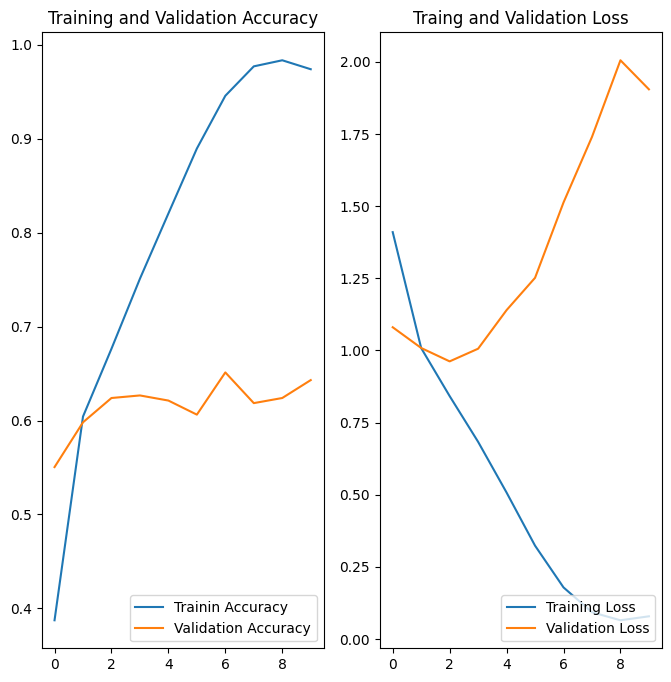

In [38]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Trainin Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Traing and Validation Loss")

plt.show()

In [39]:
save_model(model,'flower_sequential_model_trained.hdf5')